In [1]:
import pandas as pd
import numpy as np
import re
import gc # We're gonna be clearing memory a lot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("Complete_train.csv")
test=pd.read_csv("test-data.csv")
impression=pd.read_csv("Complete_Impression.csv")
item_att=pd.read_csv("Clean_Item_Attributes.csv")
item_category_map=pd.read_csv("Complete_Item_Category.csv")

# 1    0.993864
# 2    0.006136

In [3]:
print "train ",train.columns
print "test ",test.columns
print "Impression ", impression.columns

print  "item Att  "  , item_att.columns
print "Item Cat   ", item_category_map.columns

train  Index([u'impression_id', u'item_id', u'click'], dtype='object')
test  Index([u'impression_id', u'item_id'], dtype='object')
Impression  Index([u'impression_id', u'geo', u'site_id', u'uuid', u'adunit_id',
       u'refrenceUrl', u'timestamp_impression', u'uvh'],
      dtype='object')
item Att   Index([u'x', u'pipe_count', u'timestamp', u'item_id'], dtype='object')
Item Cat    Index([u'item_id', u'Keywords', u'Keywords_Score', u'Concepts',
       u'Concepts_Score', u'Keyword_count', u'Concept_count',
       u'Keyword_Median', u'Concept_Median'],
      dtype='object')


In [83]:
item_category_map.drop_duplicates(inplace=True)

In [81]:
item_category_map.nunique()

item_id           13951
Keywords           8745
Keywords_Score    10250
Concepts           6027
Concepts_Score    10043
Keyword_count        44
Concept_count         8
Keyword_Median    10073
Concept_Median     9847
dtype: int64

In [85]:
train_m=pd.merge(train,item_category_map,how="left", left_on='item_id',right_on='item_id')
test_m=pd.merge(test,item_category_map,how="left", left_on='item_id',right_on='item_id')

In [86]:
train_m.isnull().sum()

impression_id           0
item_id                 1
click                   1
Keywords          6821522
Keywords_Score    6811523
Concepts          6832043
Concepts_Score    6811523
Keyword_count     6811523
Concept_count     6811523
Keyword_Median    6811523
Concept_Median    6811523
dtype: int64

In [87]:
#Since almost 68K are missing...remove these rows...it will reduce your training set as well
train_m=train_m[train_m.Keywords_Score.notnull()]

In [88]:
train_m.isnull().sum()

impression_id         0
item_id               0
click                 0
Keywords           9999
Keywords_Score        0
Concepts          20520
Concepts_Score        0
Keyword_count         0
Concept_count         0
Keyword_Median        0
Concept_Median        0
dtype: int64

In [89]:
test_m.isnull().sum()

impression_id         0
item_id               0
Keywords          51543
Keywords_Score    51445
Concepts          51597
Concepts_Score    51445
Keyword_count     51445
Concept_count     51445
Keyword_Median    51445
Concept_Median    51445
dtype: int64

In [107]:
impression_sub=impression[impression.impression_id.isin(train_m.impression_id)]

In [92]:
print impression_sub.shape
print item_att.shape

(2934474, 8)
(31613, 4)


In [31]:
impression_sub.head()

,impression_id,geo,site_id,uuid,adunit_id,refrenceUrl,timestamp_impression,uvh
80024,7e3f4b83-e609-4233-ac6b-1dccf5b2a4f4-10nnt,144.0,432,6683d81a-3edf-497e-bf49-ae09d9ce0b62-10onw,211155,https%3A%2F%2Fm.economictimes.com%2Fmarkets%2F...,2017-10-25T18:59:30.438+05:30,NaN
169741,c8315c97-3720-4aca-8856-2a1f3d146524-3rms,144.0,74,6f338293-cff2-42da-8f8e-8407d370df67-10o78,195667,https%3A%2F%2Feconomictimes.indiatimes.com%2Fm...,2017-10-25T19:07:06.367+05:30,NaN
255094,d31afb39-dc45-4753-ab30-4d0d5fe61f51-10oa1,144.0,40,c7252cfa-600e-4c45-b8b5-1a67a8733b3d-3rv4,195676,m.economictimes.com%2Fnews%2Fpolitics-and-nati...,2017-10-25T21:21:33.408+05:30,NaN
308492,ff18fc9b-6fb2-4a69-810c-cb0d33451f59-10ow8,144.0,74,075259ea-b9c3-48dc-8fdb-06c4c48edf6f-3rh8,195667,http%3A%2F%2Feconomictimes.indiatimes.com%2Fma...,2017-10-25T21:34:29.999+05:30,NaN
353625,92be7349-4cdd-4cbd-abd7-4d11250cba91-10oa0,144.0,40,1872ef98-67e7-458b-a28e-4414e94f2c7f-10wgg,195676,m.economictimes.com%2Fnews%2Fevening-briefing%...,2017-10-25T08:49:51.939+05:30,NaN


In [108]:
impression_sub['Find']=""
import re
impression_sub["Find"]=impression_sub.refrenceUrl.apply(lambda x: (re.search(r'(?:^.*)[.]+([\w]+)[.]com',str(x))).group(1) if (re.search(r'(?:^.*)[.]+([\w]+)[.]com',str(x))) is not None else "Others") 

/Users/sowmiyanmorri/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sowmiyanmorri/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
print impression_sub.shape

(2934474, 9)


In [110]:
impression_sub.drop_duplicates(inplace=True)
print impression_sub.shape

(2934468, 9)


/Users/sowmiyanmorri/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
impression_sub.drop_duplicates(subset='impression_id', keep="last",inplace=True)

/Users/sowmiyanmorri/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
impression_sub.shape

(2826402, 9)

In [131]:
train_new=pd.merge(train_m,impression_sub,how="left", left_on='impression_id',right_on='impression_id')

In [135]:
train_new.isnull().sum()/train.shape[0]

impression_id           0.000000
item_id                 0.000000
click                   0.000000
Keywords                0.000588
Keywords_Score          0.000000
Concepts                0.001206
Concepts_Score          0.000000
Keyword_count           0.000000
Concept_count           0.000000
Keyword_Median          0.000000
Concept_Median          0.000000
geo                     0.163231
site_id                 0.163231
uuid                    0.163231
adunit_id               0.163231
refrenceUrl             0.163235
timestamp_impression    0.163231
uvh                     0.312174
Find                    0.163231
dtype: float64

In [137]:
pd.crosstab(train_new.Find, train_new.click).apply(lambda r: r, axis=1)

click,1.0,2.0
Find,,
Others,1788,33
appspot,2,0
economictimes,2249492,29711
googleusercontent,28,0
indiatimes,5123973,24851
toiblogs,13,0


In [138]:
train_new.Find.loc[train_new.Find.isnull()]="economictimes"

In [139]:
test_new=pd.merge(test_m,impression_sub,how="left", on='impression_id')

In [141]:
test_new.isnull().sum()/test_new.shape[0]

impression_id           0.000000
item_id                 0.000000
Keywords                0.273006
Keywords_Score          0.272487
Concepts                0.273292
Concepts_Score          0.272487
Keyword_count           0.272487
Concept_count           0.272487
Keyword_Median          0.272487
Concept_Median          0.272487
geo                     0.886757
site_id                 0.886757
uuid                    0.886757
adunit_id               0.886757
refrenceUrl             0.886757
timestamp_impression    0.886757
uvh                     0.976811
Find                    0.886757
dtype: float64

In [142]:
test_new.Find.loc[test_new.Find.isnull()]="economictimes"

In [143]:
print test_new.shape

(188798, 18)


## Modify from here

In [144]:
train_model=train_new[['impression_id','item_id','Keyword_count','Concept_count','Keyword_Median','Concept_Median','Find','click']]
test_model=test_new[['impression_id','item_id','Keyword_count','Concept_count','Keyword_Median','Concept_Median','Find']]

In [145]:
train_model.dtypes

impression_id      object
item_id            object
Keyword_count     float64
Concept_count     float64
Keyword_Median    float64
Concept_Median    float64
Find               object
click             float64
dtype: object

In [146]:
train_model.Find.value_counts()

indiatimes           5148824
economictimes        5057326
Others                  1821
googleusercontent         28
toiblogs                  13
appspot                    2
Name: Find, dtype: int64

In [147]:
col=['Find']
from sklearn import model_selection, preprocessing
for f in col:
    print(f)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_model[f].values.astype('str')) + list(test_model[f].values.astype('str')))
    train_model[f] = lbl.transform(list(train_model[f].values.astype('str')))
    test_model[f] = lbl.transform(list(test_model[f].values.astype('str')))

Find


/Users/sowmiyanmorri/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/sowmiyanmorri/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [148]:
train_model.dtypes

impression_id      object
item_id            object
Keyword_count     float64
Concept_count     float64
Keyword_Median    float64
Concept_Median    float64
Find                int64
click             float64
dtype: object

In [150]:
test_model.isnull().sum()

impression_id         0
item_id               0
Keyword_count     51445
Concept_count     51445
Keyword_Median    51445
Concept_Median    51445
Find                  0
dtype: int64

In [151]:
train_model.describe()

,Keyword_count,Concept_count,Keyword_Median,Concept_Median,Find,click
count,1.020801e+07,1.020801e+07,1.020801e+07,1.020801e+07,1.020801e+07,1.020801e+07
mean,2.529607e+00,2.317479e+00,9.117404e-01,9.172127e-01,3.008430e+00,1.007113e+00
std,2.935030e+00,1.400184e+00,5.060845e-02,5.930908e-02,1.000679e+00,8.403950e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,8.877780e-01,8.819680e-01,2.000000e+00,1.000000e+00
50%,2.000000e+00,2.000000e+00,9.094250e-01,9.218265e-01,4.000000e+00,1.000000e+00
75%,3.000000e+00,3.000000e+00,9.421710e-01,9.544770e-01,4.000000e+00,1.000000e+00
max,5.000000e+01,8.000000e+00,9.998000e-01,9.899100e-01,5.000000e+00,2.000000e+00


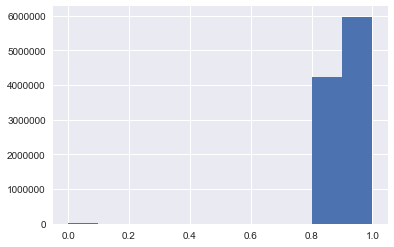

In [152]:
import pylab
pylab.figure()
pylab.hist(train_model.Keyword_Median)
pylab.show()

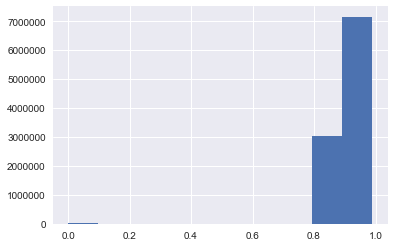

In [153]:
import pylab
pylab.figure()
pylab.hist(train_model.Concept_Median)
pylab.show()

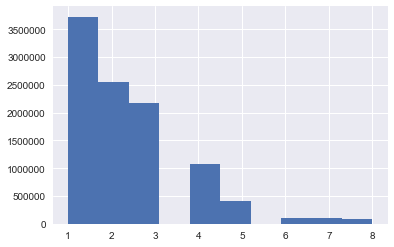

In [155]:
import pylab
pylab.figure()
pylab.hist(train_model.Concept_count)
pylab.show()

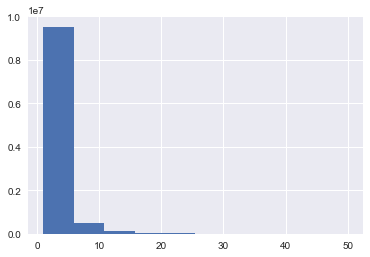

In [156]:
import pylab
pylab.figure()
pylab.hist(train_model.Keyword_count)
pylab.show()

In [158]:
train_model.Concept_count.value_counts()

1.0    3724626
2.0    2542898
3.0    2168676
4.0    1071114
5.0     415197
7.0     110243
6.0      96905
8.0      78355
Name: Concept_count, dtype: int64

In [159]:
test_model.Keyword_Median.loc[test_model.Keyword_Median.isnull()]=np.median(train_model.Keyword_Median)
test_model.Concept_Median.loc[test_model.Concept_Median.isnull()]=np.median(train_model.Concept_Median)

test_model.Keyword_count.loc[test_model.Keyword_count.isnull()]=2.0
test_model.Concept_count.loc[test_model.Concept_count.isnull()]=1.0

/Users/sowmiyanmorri/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sowmiyanmorri/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sowmiyanmorri/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sowmiyanm

In [161]:
test_model.head()

,impression_id,item_id,Keyword_count,Concept_count,Keyword_Median,Concept_Median,Find
0,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17066860,2.0,1.0,0.909425,0.921826,2
1,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17277475,1.0,2.0,0.954875,0.913657,2
2,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17325528,1.0,3.0,0.919055,0.863331,2
3,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17325531,2.0,2.0,0.856676,0.914982,2
4,0004fb27-7548-46b6-9db7-666c2d9d7def-10wx4,17052046,2.0,1.0,0.909425,0.921826,2


In [363]:
#Check if impression_ids with no click and click are exclusive set
imp_c=train.impression_id[train.click==2]
imp_nc=train.impression_id[train.click==1]

print len(list(set(imp_c)))#95526 impression id where click occurred
print len(list(set(imp_nc)))#impresssion ids where no click occurred

imp_c_specific=list(set(imp_c)-set(imp_nc))
imp_nc_specific=list(set(imp_nc)-set(imp_c))

In [162]:
X = train_model.drop(['impression_id','item_id','click'],axis=1)
y = train_model['click'].astype('int')
x_test = test_model.drop(['impression_id','item_id'],axis=1)

In [169]:
y.value_counts()

1    10135402
2       72612
Name: click, dtype: int64

In [171]:
y=y.map({1:0,2:1})

In [172]:
y.value_counts()

0    10135402
1       72612
Name: click, dtype: int64

In [163]:
print X.shape
print x_test.shape

(10208014, 5)
(188798, 5)


In [338]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,accuracy_score
kf = StratifiedKFold(n_splits=2,random_state=2018,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=1)
    
    lr.fit(xtr,ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(x_test)[:,1]
    i+=1


1 of kfold 2
('roc_auc_score', 0.60223028533559342)

2 of kfold 2
('roc_auc_score', 0.60356403672886461)


In [339]:
pred_test_full

array([ 1.13579629,  1.19780184,  1.17960229, ...,  1.1317154 ,
        1.14422514,  1.00930919])

In [342]:
pred_log=pred_test_full/2
x_l=pd.DataFrame(np.where(preds_xgb>0.09,2,1),columns=['click'])

In [402]:
x_l.click.value_counts()/x_l.shape[0]

1    0.96501
2    0.03499
Name: click, dtype: float64

In [377]:
import xgboost as xgb
def runXGB(xtrain,xvalid,ytrain,yvalid,xtest,eta=0.1,num_rounds=10000,max_depth=4):
    params = {
        'objective':'binary:logistic',        
        'max_depth':max_depth,
        'learning_rate':eta,
        'eval_metric':'auc',
        'min_child_weight':6,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'seed':2018,
        'reg_lambda':1.3,
        'reg_alpha':8,
        'gamma':10,
        'scale_pos_weight':1.6
        #'n_thread':-1
    }
  
    weights = np.zeros(len(ytrain))
    weights[ytrain == 0] = 1
    weights[ytrain == 1] = 9  
    dtrain = xgb.DMatrix(xtrain,label=ytrain,weight=weights)
    dvalid = xgb.DMatrix(xvalid,label=yvalid)
    dtest = xgb.DMatrix(xtest)
    watchlist = [(dtrain,'train'),(dvalid,'test')]
    
    
    model = xgb.train(params,dtrain,num_rounds,watchlist,early_stopping_rounds=20,maximize=True,verbose_eval=500)
    pred_val = model.predict(dvalid,ntree_limit=model.best_ntree_limit)
    pred_test = model.predict(dtest,ntree_limit=model.best_ntree_limit)
    return pred_val,pred_test,model

In [477]:
kf = StratifiedKFold(n_splits=3,random_state=2018)
pred_test_full =0
cv_score = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    pred_val_xg,pred_test,xg_model = runXGB(xtr,xvl,ytr,yvl,x_test,num_rounds=10000,eta=0.1)    
    pred_test_full += pred_test/i
    i+=1

1 of KFold 3
[0]	train-auc:0.63281	test-auc:0.640652
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 20 rounds.
[500]	train-auc:0.710652	test-auc:0.68948
Stopping. Best iteration:
[738]	train-auc:0.714529	test-auc:0.691963

2 of KFold 3
[0]	train-auc:0.637886	test-auc:0.623022
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 20 rounds.
[500]	train-auc:0.709043	test-auc:0.694942
Stopping. Best iteration:
[830]	train-auc:0.714056	test-auc:0.699105

3 of KFold 3
[0]	train-auc:0.633504	test-auc:0.625413
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 20 rounds.
[500]	train-auc:0.713352	test-auc:0.687617
Stopping. Best iteration:
[500]	train-auc:0.713352	test-auc:0.687617



In [478]:
pred_test_full

array([ 0.08785807,  0.20193905,  0.28169203, ...,  0.13979144,
        0.4670296 ,  0.42563623], dtype=float32)

In [493]:
preds_xgb=pred_test_full/3

In [497]:
preds_xgb

array([ 0.50732094,  0.51682192,  0.52345711, ...,  0.51164716,
        0.53884077,  0.53541028], dtype=float32)

In [494]:
preds_xgb =  1  /  ( 1 + np.exp(-preds_xgb) )

In [511]:
x=pd.DataFrame(np.where(preds_xgb>0.56,2,1),columns=['click'])

In [512]:
x.click.value_counts()

1    188635
2       163
Name: click, dtype: int64

In [513]:
submit = pd.DataFrame({'impression_id':test_model['impression_id'],'item_id':test_model['item_id'],'click':x.click})
submit=submit[['impression_id','item_id','click']]
submit.head()

,impression_id,item_id,click
0,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17066860,1
1,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17277475,1
2,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17325528,1
3,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17325531,1
4,0004fb27-7548-46b6-9db7-666c2d9d7def-10wx4,17052046,1


In [ ]:
#0.1 -52.43 ;0.09-52.38

In [514]:
submit.click.value_counts()

1    188635
2       163
Name: click, dtype: int64

In [515]:
submit.click[submit.impression_id.isin(imp_c_specific)]=2
submit.click[submit.impression_id.isin(imp_nc_specific)]=1

/Users/sowmiyanmorri/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [516]:
submit.click.value_counts()/submit.shape[0]

1    0.995503
2    0.004497
Name: click, dtype: float64

In [489]:
submit.to_csv("Submission.csv",index=False)

In [492]:
submit = pd.DataFrame({'impression_id':test_model['impression_id'],'item_id':test_model['item_id'],'click':pred_test_full})
submit=submit[['impression_id','item_id','click']]
submit.to_csv("Submission_prob.csv",index=False)
submit.head()

,impression_id,item_id,click
0,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17066860,0.087858
1,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17277475,0.201939
2,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17325528,0.281692
3,00023151-2f1e-429b-89a5-2f360dad9880-10nql,17325531,0.153995
4,0004fb27-7548-46b6-9db7-666c2d9d7def-10wx4,17052046,0.087858


In [517]:
def getCountVar(compute_df, count_df, var_name):
	grouped_df = count_df.groupby(var_name)
	count_dict = {}
	for name, group in grouped_df:
		count_dict[name] = group.shape[0]

	count_list = []
	for index, row in compute_df.iterrows():
		name = row[var_name]
		count_list.append(count_dict.get(name, 0))
	return count_list

In [518]:
submit["City_Category"]  = getCountVar(submit, submit, "item_id")

In [370]:
from sklearn import preprocessing, metrics, ensemble
def runET(xtrain,xvalid,ytrain,yvalid,xtest,depth=20, leaf=10, feat=0.2):
    model = ensemble.ExtraTreesClassifier(n_estimators = 100,
                    max_depth = 20,
                    min_samples_split = 2,
                    min_samples_leaf = 10,
                    max_features =  0.2,
                    n_jobs = 6,
                    random_state = 0)
    model.fit(xtrain, ytrain)
    train_preds = model.predict_proba(xtrain)[:,1]
    test_preds = model.predict_proba(xvalid)[:,1]
    test_preds2 = model.predict_proba(xtest)[:,1]
    test_loss = 0
    if yvalid is not None:
        train_loss = metrics.auc(ytrain, train_preds)
        test_loss = metrics.auc(yvalid, test_preds)
        print "Depth, leaf, feat : ", depth, leaf, feat
        print "Train and Test loss : ", train_loss, test_loss
    return test_preds2, test_loss,model


kf = StratifiedKFold(n_splits=5,random_state=2018)
pred_test_full =0
cv_score = []
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    pred_test,test_loss,et_model = runET(xtr,xvl,ytr,yvl,x_test,depth=20, leaf=10, feat=0.2)
    cv_score.append(test_loss)
    pred_test_full += pred_test
    i+=1


1 of kfold 5


ValueError: Reordering is not turned on, and the x array is not increasing: [1 1 1 ..., 0 0 0]